# Projeto final - TERA

Esse notebook contém o projeto final do grupo de Macroeconomia do curso de Data Science e Machine Learning da TERA. 


### Definição do problema

Neste projeto, utilizou-se dados coletados dos seguintes websites:

https://www.gov.br/produtividade-e-comercio-exterior/pt-br


https://www.ipea.gov.br/portal/


https://www.bcb.gov.br/

In [1]:
# importando as bibliotecas
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import shap
import pandas as pd
import numpy as np
import seaborn as sn
import sklearn as sk
import statsmodels as stm
import matplotlib.pyplot as plt
import xgboost
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression as cpu_LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from statsmodels.tools.eval_measures import rmse
import sklearn.metrics

ModuleNotFoundError: No module named 'shap'

In [2]:
df1 = pd.read_excel(r"C:\Users\balis\Desktop\data\preview-Copy3(1).xlsx")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 53 columns):
 #   Column                                                                            Non-Null Count  Dtype         
---  ------                                                                            --------------  -----         
 0   Data                                                                              81 non-null     datetime64[ns]
 1   (USA GDP Quarterly)__(US$ (Millions))                                             81 non-null     int64         
 2   (Cobre)__(Último)                                                                 81 non-null     float64       
 3   (Cobre)__(Vol)                                                                    81 non-null     float64       
 4   (Cobre)__(Var)                                                                    81 non-null     float64       
 5   (EU GDP Quarterly)__(EU GDP (Millions Euros))                     

In [4]:
df1.drop(columns={'(Vale Finanças)__(Amortização de Ágio)','(Vale Finanças)__(Outras)','(Vale Finanças)__(Despesas Operacionais)','(Vale Finanças)__(Administrativas)','(Vale Finanças)__(Equivalência Patrimonial)'}, inplace = True)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 48 columns):
 #   Column                                                                            Non-Null Count  Dtype         
---  ------                                                                            --------------  -----         
 0   Data                                                                              81 non-null     datetime64[ns]
 1   (USA GDP Quarterly)__(US$ (Millions))                                             81 non-null     int64         
 2   (Cobre)__(Último)                                                                 81 non-null     float64       
 3   (Cobre)__(Vol)                                                                    81 non-null     float64       
 4   (Cobre)__(Var)                                                                    81 non-null     float64       
 5   (EU GDP Quarterly)__(EU GDP (Millions Euros))                     

In [6]:
df1.drop(columns={'(Vale Finanças)__(Despesas Financeiras)','(Vale Finanças)__(Receitas Financeiras)','(Vale Finanças)__(Variações Monetárias)','(Vale Finanças)__(Resultado em  Operações Descontinuadas)'},inplace = True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 44 columns):
 #   Column                                                                            Non-Null Count  Dtype         
---  ------                                                                            --------------  -----         
 0   Data                                                                              81 non-null     datetime64[ns]
 1   (USA GDP Quarterly)__(US$ (Millions))                                             81 non-null     int64         
 2   (Cobre)__(Último)                                                                 81 non-null     float64       
 3   (Cobre)__(Vol)                                                                    81 non-null     float64       
 4   (Cobre)__(Var)                                                                    81 non-null     float64       
 5   (EU GDP Quarterly)__(EU GDP (Millions Euros))                     

In [8]:
pd.set_option('display.max_columns', 100)
df1.tail(10)

,Data,(USA GDP Quarterly)__(US$ (Millions)),(Cobre)__(Último),(Cobre)__(Vol),(Cobre)__(Var),(EU GDP Quarterly)__(EU GDP (Millions Euros)),(Emprego Industria BR)__(Pessoal Empregado industria),(Europe Main Unenployment Rate)__(Unemployment Germany),(Europe Main Unenployment Rate)__(Unenployment France),(Europe Main Unenployment Rate)__(Unenployment Italy),(Europe Main Unenployment Rate)__(Unemployement England),(Europe Main Unenployment Rate)__(Mean Main Europe),(Unemployement USA)__(usa_unemploy),(Construção Civil China)__(Gross Output Value of Construction(100 million yuan)),(Merge)__(Taxa de cambio minerais metalicos),(Merge)__(Taxa de cambio compra media),(Merge)__(Taxa de cambio compra_fim de periodo),(Merge)__(Exportaçoes FOB),(Merge)__(PIBbrasil),(Merge)__(PIBacumulado12),(Vale Finanças)__(Receita Operacional Bruta),(Vale Finanças)__(Impostos),(Vale Finanças)__(Receita Operacional Líquida),(Vale Finanças)__(Custo dos Produtos Vendidos),(Vale Finanças)__(Lucro bruto),(Vale Finanças)__(Margem bruta (%)),(Vale Finanças)__(Resultado de Participações Societárias),(Vale Finanças)__(Vendas),(Vale Finanças)__(Pesquisa e Desenvolvimento),(Vale Finanças)__(Outras Despesas Operacionais Líquidas),(Vale Finanças)__(Resultado Financeiro),(Vale Finanças)__(Lucro Operacional),(Vale Finanças)__(IR e Contribuição Social),(Vale Finanças)__(Lucro Líquido *),(Vale Ações)__(Var),(Vale Ações)__(Class),(Vale Ações)__(Preço),(varIvestimento (FBCF))__(USA),(varIvestimento (FBCF))__(BRA),(varIvestimento (FBCF))__(OECD),(varIvestimento (FBCF))__(G7),(GDP OECD)__(OECD),(Preço Produtor Mundo)__(OECD),(Preço Produtor Mundo)__(EU)
71,2020-01-01,5254152,2.502333,3.962033e+05,6.986667,3361625.0,94.600000,5.000000,7.833333,9.000000,5.2,6.758333,3.914468,35916.59,120.354161,4.2689,4.2689,14429.71527,617747.2,7418509.6,NaN,NaN,NaN,-4278.0,2691.0,38.6,-110.0,NaN,95.0,NaN,NaN,1963.0,NaN,161.0,-20.00,Baixa,34.313333,-0.184949,3.875861,-1.779239,-1.453297,-1.614845,108.5044,111.6409
72,2020-04-01,4930197,2.988333,5.266867e+05,3.630000,3093855.3,91.966667,6.133333,7.400000,8.600000,4.9,6.758333,13.242531,100840.12,127.002518,5.4264,5.4264,17593.79865,555387.4,7419772.0,NaN,NaN,NaN,-4212.0,3306.0,44.0,43.0,NaN,90.0,NaN,NaN,2084.0,NaN,919.0,27.43,Alta,38.290000,-6.706084,-15.284488,-11.254107,-8.345875,-10.325133,106.2901,109.8032
73,2020-07-01,5349433,3.334667,4.935133e+05,5.213333,3418239.0,92.800000,6.333333,8.766667,10.000000,5.0,7.525000,8.731744,167927.00,100.685158,5.2027,5.2027,19416.00718,629700.9,7367126.2,NaN,NaN,NaN,-4816.0,5946.0,55.2,-6.0,NaN,105.0,NaN,NaN,5001.0,NaN,2807.0,10.06,Alta,45.310000,5.349201,11.352741,8.921244,7.669579,9.438180,107.7736,110.9070
74,2020-10-01,5539370,3.883500,1.180990e+06,4.623333,3587115.0,94.733333,6.133333,8.100000,9.766667,4.9,7.225000,7.029449,263947.04,94.057418,5.7712,5.7712,17649.33560,661149.0,7387314.3,NaN,NaN,NaN,-5733.0,9036.0,61.2,-46.0,NaN,153.0,NaN,NaN,1795.0,NaN,644.0,43.38,Alta,58.626667,3.497661,15.473620,2.774449,2.704164,0.984264,108.8669,112.4142
75,2021-01-01,5444406,4.479333,6.800400e+05,2.700000,3394071.5,95.466667,6.000000,8.133333,10.166667,4.8,7.275000,6.221246,47333.17,73.589245,5.4753,5.4753,14947.62600,653790.4,7512890.9,NaN,NaN,NaN,-4298.0,8255.0,65.8,-13.0,NaN,98.0,NaN,NaN,7661.0,NaN,5477.0,16.36,Alta,73.896667,1.624299,8.018537,0.721106,1.102374,0.804630,112.5742,115.9543
76,2021-04-01,5784816,4.308167,5.188000e+05,-1.483333,3574072.8,97.066667,5.933333,8.100000,9.800000,4.8,7.158333,5.946420,119843.55,71.304910,5.4030,5.4030,26059.43186,713652.2,7842937.4,NaN,NaN,NaN,-5465.0,11049.0,66.9,116.0,NaN,139.0,NaN,NaN,10286.0,NaN,7537.0,17.18,Alta,91.983333,0.876426,-4.302933,0.783324,1.090529,1.715245,117.3120,120.3563
77,2021-07-01,5883177,4.367667,4.555700e+05,3.026667,3671256.2,98.400000,5.500000,7.800000,9.100000,4.7,6.775000,5.114754,191283.37,59.135480,5.1210,5.1210,25508.59550,742864.5,8218584.1,NaN,NaN,NaN,-5836.0,6846.0,54.0,198.0,NaN,136.0,NaN,NaN,3843.0,NaN,3958.0,-27.95,Baixa,80.613

In [9]:
df1.astype({'(USA GDP Quarterly)__(US$ (Millions))': 'float'}).dtypes

Data                                                                                datetime64[ns]
(USA GDP Quarterly)__(US$ (Millions))                                                      float64
(Cobre)__(Último)                                                                          float64
(Cobre)__(Vol)                                                                             float64
(Cobre)__(Var)                                                                             float64
(EU GDP Quarterly)__(EU GDP (Millions Euros))                                              float64
(Emprego Industria BR)__(Pessoal Empregado industria)                                      float64
(Europe Main Unenployment Rate)__(Unemployment Germany)                                    float64
(Europe Main Unenployment Rate)__(Unenployment France)                                     float64
(Europe Main Unenployment Rate)__(Unenployment Italy)                                      float64
(Europe Ma

In [10]:
df1.drop(columns = {'(Vale Finanças)__(Outras Despesas Operacionais Líquidas)'}, inplace = True)

In [11]:
#tirar outras features com poucas observações

In [12]:
df1.drop(columns = {'(Vale Finanças)__(Receita Operacional Bruta)','(Vale Finanças)__(Impostos)','(Vale Finanças)__(Receita Operacional Líquida)','(Vale Finanças)__(Vendas)','(Vale Finanças)__(Resultado Financeiro)','(Vale Finanças)__(IR e Contribuição Social)'}, inplace = True)

In [13]:
df2 = pd.get_dummies(df1, columns=['(Vale Ações)__(Class)'])

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 38 columns):
 #   Column                                                                            Non-Null Count  Dtype         
---  ------                                                                            --------------  -----         
 0   Data                                                                              81 non-null     datetime64[ns]
 1   (USA GDP Quarterly)__(US$ (Millions))                                             81 non-null     int64         
 2   (Cobre)__(Último)                                                                 81 non-null     float64       
 3   (Cobre)__(Vol)                                                                    81 non-null     float64       
 4   (Cobre)__(Var)                                                                    81 non-null     float64       
 5   (EU GDP Quarterly)__(EU GDP (Millions Euros))                     

In [15]:
mean_value1=df2['(Vale Finanças)__(Lucro Líquido  *)'].mean()
df2['(Vale Finanças)__(Lucro Líquido  *)'].fillna(value=mean_value1, inplace=True)
mean_value2=df2['(Vale Finanças)__(Lucro Operacional)'].mean()
df2['(Vale Finanças)__(Lucro Operacional)'].fillna(value=mean_value2, inplace=True)
mean_value3=df2['(Vale Finanças)__(Pesquisa e Desenvolvimento)'].mean()
df2['(Vale Finanças)__(Pesquisa e Desenvolvimento)'].fillna(value=mean_value3, inplace=True)
mean_value4=df2['(Vale Finanças)__(Resultado de Participações Societárias)'].mean()
df2['(Vale Finanças)__(Resultado de Participações Societárias)'].fillna(value=mean_value4, inplace=True)
mean_value5=df2['(Vale Finanças)__(Margem bruta (%))'].mean()
df2['(Vale Finanças)__(Margem bruta (%))'].fillna(value=mean_value5, inplace=True)
mean_value6=df2['(Vale Finanças)__(Lucro bruto)'].mean()
df2['(Vale Finanças)__(Lucro bruto)'].fillna(value=mean_value6, inplace=True)
mean_value7=df2['(Vale Finanças)__(Custo dos Produtos Vendidos)'].mean()
df2['(Vale Finanças)__(Custo dos Produtos Vendidos)'].fillna(value=mean_value7, inplace=True)
mean_value8=df2['(Merge)__(Taxa de cambio minerais metalicos)'].mean()
df2['(Merge)__(Taxa de cambio minerais metalicos)'].fillna(value=mean_value8, inplace=True)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 38 columns):
 #   Column                                                                            Non-Null Count  Dtype         
---  ------                                                                            --------------  -----         
 0   Data                                                                              81 non-null     datetime64[ns]
 1   (USA GDP Quarterly)__(US$ (Millions))                                             81 non-null     int64         
 2   (Cobre)__(Último)                                                                 81 non-null     float64       
 3   (Cobre)__(Vol)                                                                    81 non-null     float64       
 4   (Cobre)__(Var)                                                                    81 non-null     float64       
 5   (EU GDP Quarterly)__(EU GDP (Millions Euros))                     

In [98]:
df2.describe()

,(USA GDP Quarterly)__(US$ (Millions)),(Cobre)__(Último),(Cobre)__(Vol),(Cobre)__(Var),(EU GDP Quarterly)__(EU GDP (Millions Euros)),(Emprego Industria BR)__(Pessoal Empregado industria),(Europe Main Unenployment Rate)__(Unemployment Germany),(Europe Main Unenployment Rate)__(Unenployment France),(Europe Main Unenployment Rate)__(Unenployment Italy),(Europe Main Unenployment Rate)__(Unemployement England),(Europe Main Unenployment Rate)__(Mean Main Europe),(Unemployement USA)__(usa_unemploy),(Construção Civil China)__(Gross Output Value of Construction(100 million yuan)),(Merge)__(Taxa de cambio minerais metalicos),(Merge)__(Taxa de cambio compra media),(Merge)__(Taxa de cambio compra_fim de periodo),(Merge)__(Exportaçoes FOB),(Merge)__(PIBbrasil),(Merge)__(PIBacumulado12),(Vale Finanças)__(Custo dos Produtos Vendidos),(Vale Finanças)__(Lucro bruto),(Vale Finanças)__(Margem bruta (%)),(Vale Finanças)__(Resultado de Participações Societárias),(Vale Finanças)__(Pesquisa e Desenvolvimento),(Vale Finanças)__(Lucro Operacional),(Vale Finanças)__(Lucro Líquido *),(Vale Ações)__(Var),(Vale Ações)__(Preço),(varIvestimento (FBCF))__(USA),(varIvestimento (FBCF))__(BRA),(varIvestimento (FBCF))__(OECD),(varIvestimento (FBCF))__(G7),(GDP OECD)__(OECD),(Preço Produtor Mundo)__(OECD),(Preço Produtor Mundo)__(EU),(Vale Ações)__(Class)_Alta,(Vale Ações)__(Class)_Baixa
count,8.100000e+01,81.000000,8.100000e+01,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,4.183830e+06,2.683856,3.555824e+05,0.844568,2.895315e+06,102.224341,7.574486,8.980658,9.388477,7.628395,8.393004,6.151501,76198.740990,163.671879,2.908474,2.908474,15334.215912,393487.344444,4.568502e+06,-4611.088040,4646.966325,39.594550,150.825956,210.808546,3002.130547,2118.825724,5.763086,24.294733,0.544131,0.790044,0.479115,0.365397,0.467341,97.250031,97.993120,0.592593,0.407407
std,9.055207e+05,1.095956,3.030934e+05,4.885248,4.483818e+05,7.985065,2.039542,0.889114,1.944852,2.150014,0.935798,2.012943,67920.603548,96.600089,1.130303,1.130303,5377.548138,184902.547904,2.182276e+06,1618.667689,2764.079123,17.837027,206.969758,165.044864,2954.403666,2596.912513,18.242014,19.068565,1.791554,4.631197,2.038159,1.739981,1.674752,13.000984,14.542293,0.494413,0.494413
min,2.721842e+06,0.671833,4.230000e+04,-20.296667,2.104810e+06,90.033333,4.966667,7.133333,6.000000,4.700000,6.383333,3.623007,3882.010000,59.135480,1.555500,1.555500,4612.069084,120385.900000,1.358396e+06,-7247.000000,780.000000,0.228000,-349.000000,22.000000,-6739.000000,-8843.000000,-41.610000,2.836667,-6.706084,-15.284488,-11.254107,-8.345875,-10.325133,75.201760,75.483280,0.000000,0.000000
25%,3.557633e+06,1.933167,9.322667e+04,-2.010000,2.612153e+06,95.800000,6.033333,8.433333,8.033333,5.500000,7.550000,4.721235,24914.550000,97.213701,2.033100,2.033100,11153.005700,215128.800000,2.516702e+06,-5721.000000,2561.000000,37.600000,36.827752,95.000000,1685.000000,954.000000,-7.140000,11.820000,-0.184949,-1.212556,0.116734,0.040325,0.366019,88.397520,88.255500,0.000000,0.000000
50%,4.047165e+06,2.909500,3.221433e+05,1.096667,2.839694e+06,99.000000,6.833333,8.966667,8.833333,7.300000,8.591667,5.601488,51709.500000,140.692890,2.624000,2.624000,15741.666770,381795.300000,4.522649e+06,-4795.000000,4156.000000,43.500000,149.000000,161.446000,3000.000000,2118.825724,6.790000,20.083333,0.735287,0.762056,0.686916,0.583072,0.563379,99.829860,99.739740,1.000000,0.000000
75%,4.857936e+06,3.490500,5.036267e+05,3.796667,3.249830e+06,110.000000,9.100000,9.533333,11.033333,9.400000,9.150000,7.412524,115247.520000,180.166796,3.480500,3.480500,19483.912810,532947.800000,6.371791e+06,-4122.000000,6049.000000,49.579217,191.000000,273.372846,4291.000000,37

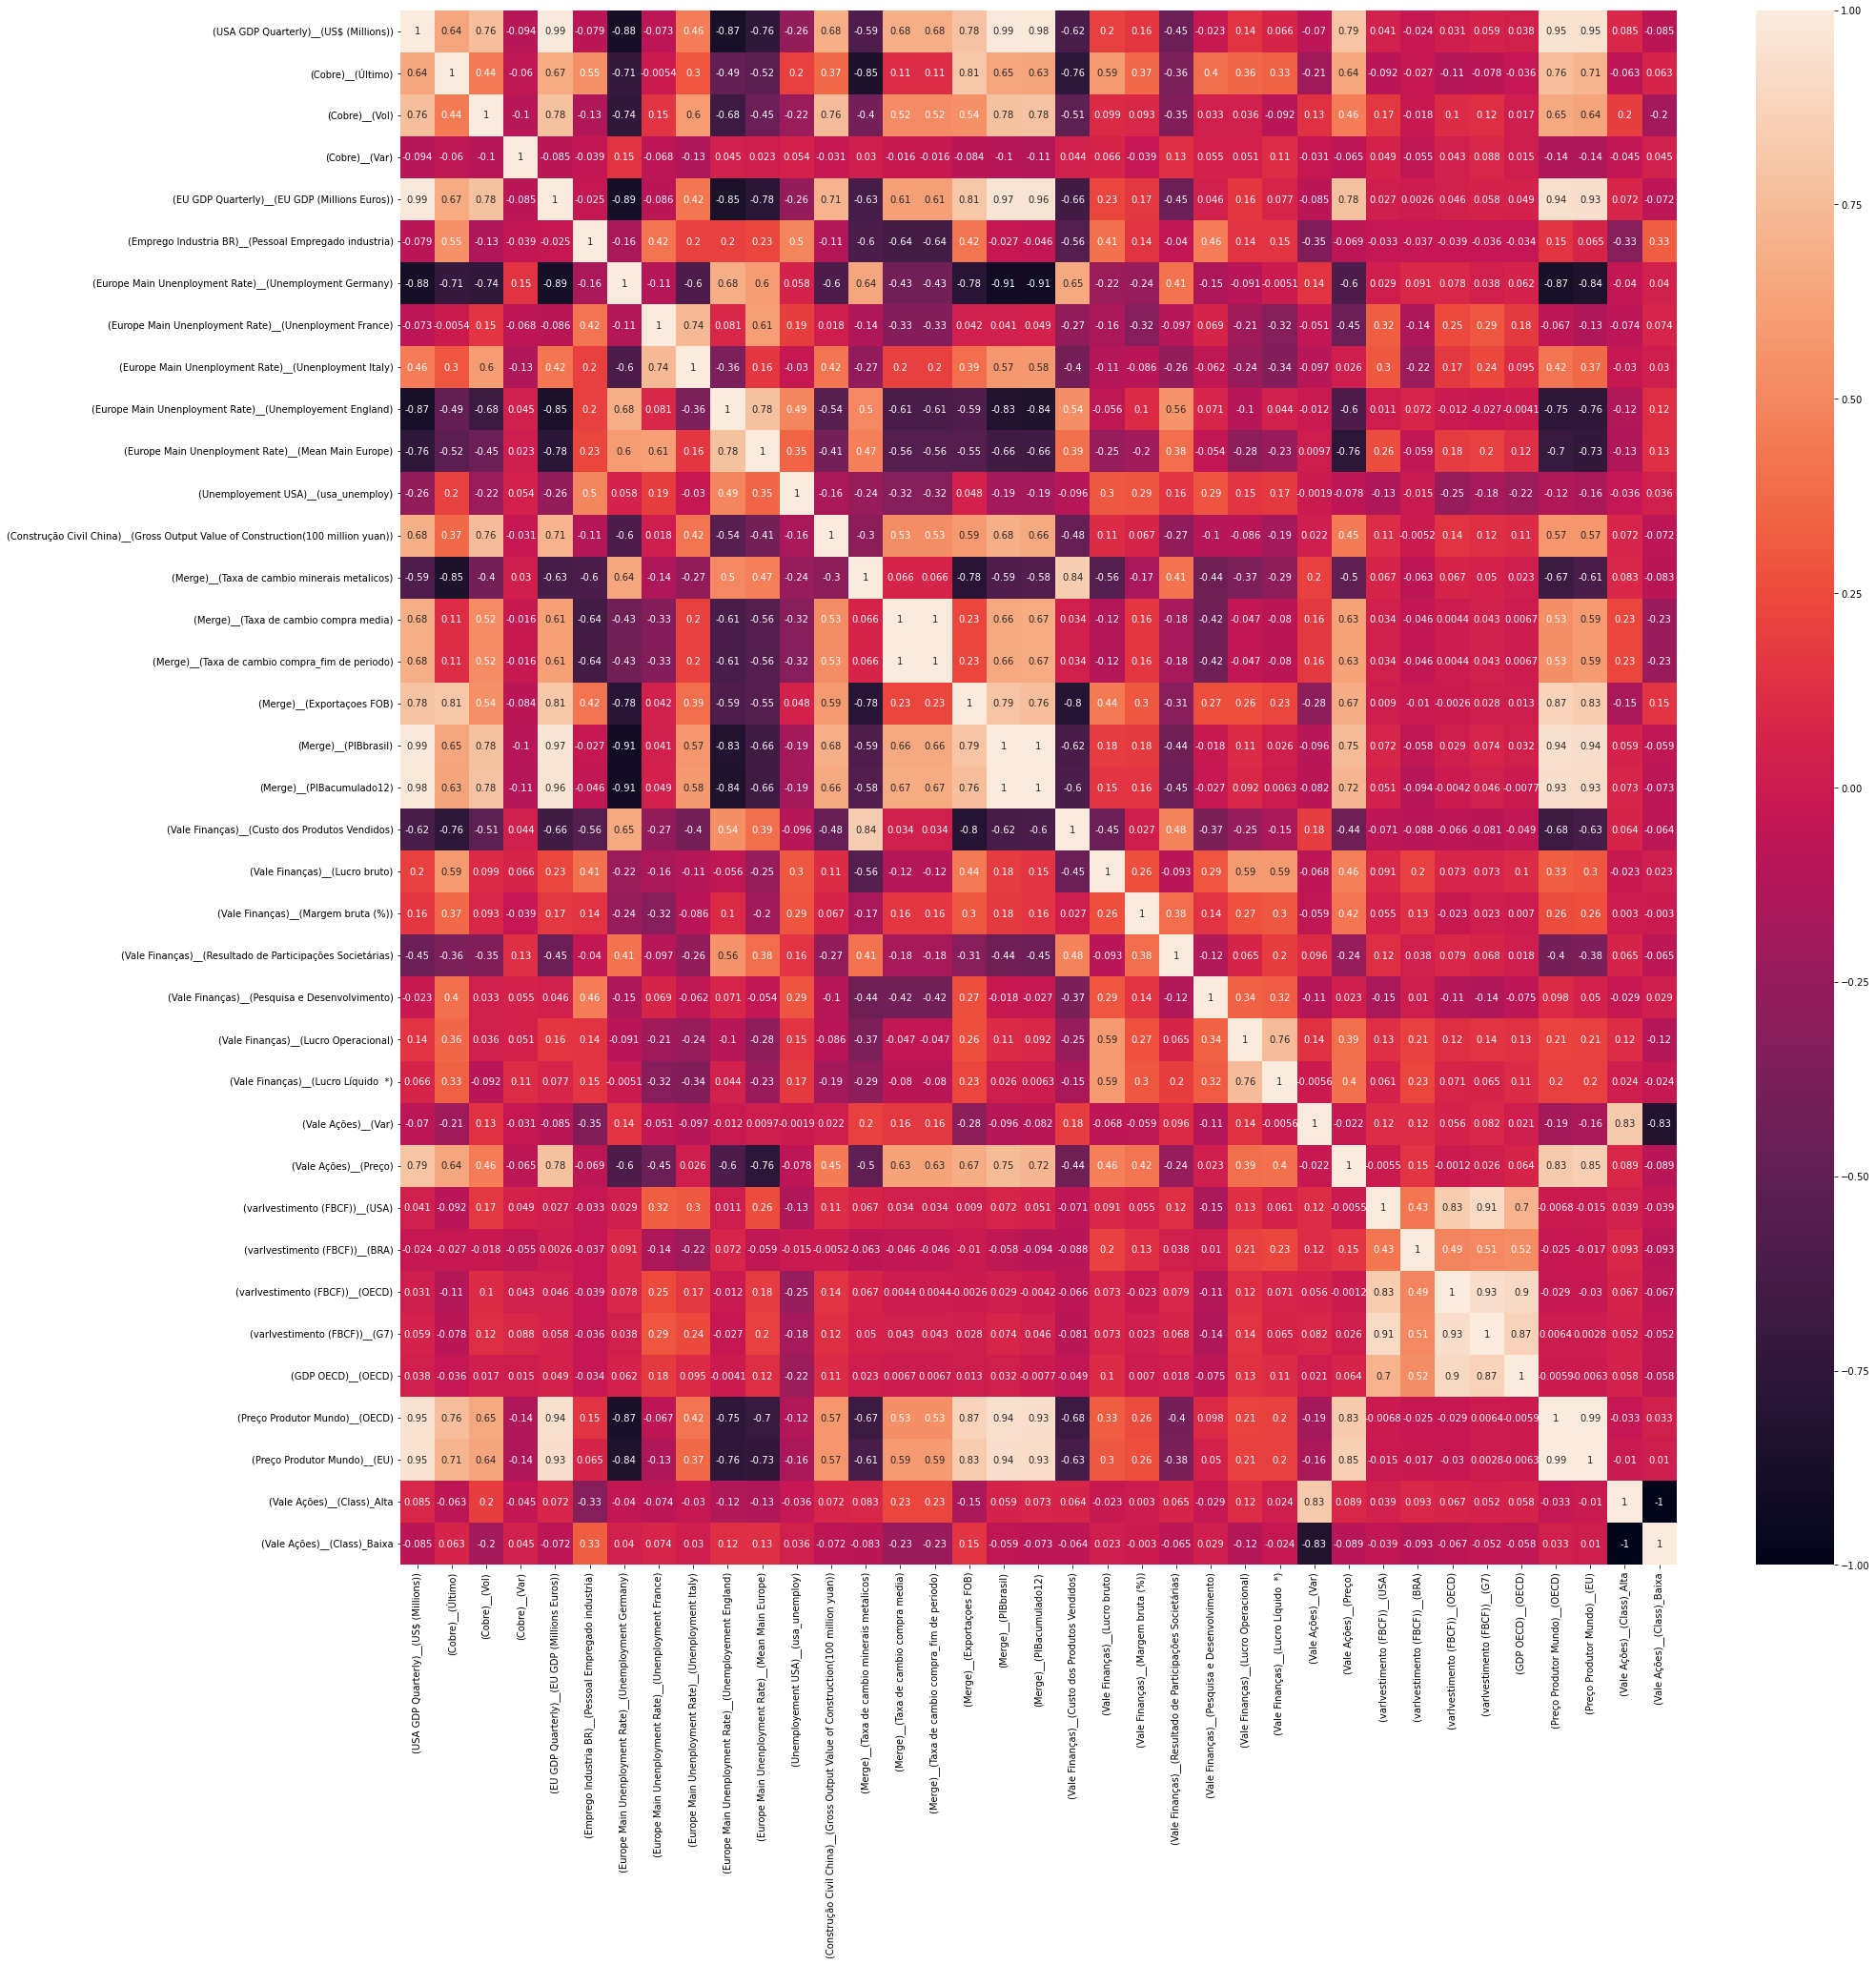

In [17]:
corr_matrixdf2 = df2.corr()
plt.figure(figsize = (30,30))
sn.heatmap(corr_matrixdf2, annot=True)
plt.show()


In [18]:
corr_matrixdf2['(Vale Ações)__(Preço)'].sort_values(ascending=False)

(Vale Ações)__(Preço)                                                               1.000000
(Preço Produtor Mundo)__(EU)                                                        0.849964
(Preço Produtor Mundo)__(OECD)                                                      0.827186
(USA GDP Quarterly)__(US$ (Millions))                                               0.794096
(EU GDP Quarterly)__(EU GDP (Millions Euros))                                       0.777117
(Merge)__(PIBbrasil)                                                                0.746912
(Merge)__(PIBacumulado12)                                                           0.723826
(Merge)__(Exportaçoes FOB)                                                          0.673645
(Cobre)__(Último)                                                                   0.640773
(Merge)__(Taxa de cambio compra media)                                              0.630785
(Merge)__(Taxa de cambio compra_fim de periodo)                       

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
df3 = df2.astype ({'(USA GDP Quarterly)__(US$ (Millions))':'float'})

In [21]:
df3.drop(columns={'Data'},inplace = True)

In [22]:
df3 = pd.DataFrame(StandardScaler().fit_transform(df3),columns = df3.columns)

In [23]:
df3['counter'] = range(len(df3))

In [24]:
df3 = df3.astype ({'counter':'float'})

In [25]:
print(df3)

    (USA GDP Quarterly)__(US$ (Millions))  (Cobre)__(Último)  (Cobre)__(Vol)  \
0                               -1.624587          -1.775074       -0.930280   
1                               -1.591672          -1.845311       -1.040057   
2                               -1.510305          -1.847300       -1.017526   
3                               -1.600260          -1.783796       -0.859600   
4                               -1.502830          -1.766198       -0.957060   
..                                    ...                ...             ...   
76                               1.779044           1.491330        0.541861   
77                               1.888344           1.545959        0.331946   
78                               2.244147           1.677557        1.513687   
79                               2.030087           1.336166        0.147284   
80                               2.410400           0.751316        0.382784   

    (Cobre)__(Var)  (EU GDP Quarterly)_

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 38 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   (USA GDP Quarterly)__(US$ (Millions))                                             81 non-null     float64
 1   (Cobre)__(Último)                                                                 81 non-null     float64
 2   (Cobre)__(Vol)                                                                    81 non-null     float64
 3   (Cobre)__(Var)                                                                    81 non-null     float64
 4   (EU GDP Quarterly)__(EU GDP (Millions Euros))                                     81 non-null     float64
 5   (Emprego Industria BR)__(Pessoal Empregado industria)                             81 non-null     float64
 6   (Eur

In [27]:
x = df3[['(Preço Produtor Mundo)__(EU)','(Preço Produtor Mundo)__(OECD)','(USA GDP Quarterly)__(US$ (Millions))','(EU GDP Quarterly)__(EU GDP (Millions Euros))','(Merge)__(PIBbrasil)','(Merge)__(PIBacumulado12)','(Merge)__(Exportaçoes FOB)','(Cobre)__(Último)','(Merge)__(Taxa de cambio compra media)','(Merge)__(Taxa de cambio compra_fim de periodo)','(Vale Finanças)__(Lucro bruto)','(Cobre)__(Vol)','(Construção Civil China)__(Gross Output Value of Construction(100 million yuan))','(Vale Finanças)__(Margem bruta (%))','(Vale Finanças)__(Lucro Líquido  *)','(Vale Finanças)__(Lucro Operacional)','(varIvestimento (FBCF))__(BRA)','(GDP OECD)__(OECD)','(varIvestimento (FBCF))__(G7)','(Europe Main Unenployment Rate)__(Unenployment Italy)','(Vale Finanças)__(Pesquisa e Desenvolvimento)','(varIvestimento (FBCF))__(OECD)','(varIvestimento (FBCF))__(USA)','(Cobre)__(Var)','(Emprego Industria BR)__(Pessoal Empregado industria)','(Unemployement USA)__(usa_unemploy)','(Vale Finanças)__(Resultado de Participações Societárias)','(Vale Finanças)__(Custo dos Produtos Vendidos)','(Europe Main Unenployment Rate)__(Unenployment France)','(Merge)__(Taxa de cambio minerais metalicos)','(Europe Main Unenployment Rate)__(Unemployment Germany)','(Europe Main Unenployment Rate)__(Unemployement England)','(Europe Main Unenployment Rate)__(Mean Main Europe)','counter']]; 
y = df2['(Vale Ações)__(Class)_Alta']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 42)

In [28]:
params ={
        'min_child_weight': [1, 5, 10],
        'alpha': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,8,10,12,15,20],
        'n_estimators': [4,5,6,7,8,9,10,15,20,30,40,50,60]}
trained_model = XGBClassifier(learning_rate=0.3, objective='binary:logistic', nthread=1, verbose = False)

In [29]:
folds = 5
param_comb = 10
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(trained_model, param_distributions=params, 
                                   n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=4, cv=skf.split(x,y), verbose=3, random_state=1001 )
random_search.fit(x, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:55:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001E050AB7900>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_...
                                           n_estimators=100, n_jobs=None,
                                           nthread=1, num_parallel_tree=None,
                           

In [30]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([0.05169506, 0.00809574, 0.00819359, 0.018083  , 0.00871196,
       0.02678361, 0.00814576, 0.00903573, 0.0082314 , 0.01142578]), 'std_fit_time': array([0.03402029, 0.00073041, 0.00144151, 0.00127213, 0.00095453,
       0.00228009, 0.00056109, 0.00067188, 0.0014743 , 0.00049321]), 'mean_score_time': array([0.00497141, 0.00474873, 0.00403481, 0.00493274, 0.00428452,
       0.00430274, 0.00417619, 0.00471797, 0.00505042, 0.00472512]), 'std_score_time': array([0.00095351, 0.00058869, 0.00042479, 0.00055506, 0.00039288,
       0.00059776, 0.00051574, 0.0007399 , 0.00082382, 0.00096769]), 'param_subsample': masked_array(data=[0.8, 0.8, 0.8, 1.0, 0.6, 0.6, 0.8, 0.6, 0.6, 0.6],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[30, 6, 8, 40, 7, 60, 6, 10, 7, 10],
             mask=[False, False, False, False

In [31]:
params ={
        'objective': 'binary:logistic',
        'learning_rate': 0.3,
        'min_child_weight': 1,
        'alpha': 0.5,
        'subsample': 0.6,
        'colsample_bytree': 0.6,
        'max_depth': 12,
        'n_estimators': 10}
trained_model = XGBClassifier(**params)
trained_model.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xtest, ytest)], eval_metric='auc', verbose=False)

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


XGBClassifier(alpha=0.5, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [32]:
ypred = trained_model.predict(xtest)

In [33]:
print("Acurácia: ", accuracy_score(ytest, ypred))
print("Matriz de confusão: ", confusion_matrix(ytest, ypred))

Acurácia:  0.6190476190476191
Matriz de confusão:  [[ 3  3]
 [ 5 10]]


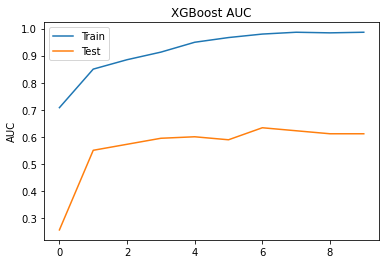

In [34]:
fig, ax = plt.subplots()

evals_result = trained_model.evals_result()
x_axis = range(0, len(evals_result['validation_0']['auc']))

ax.plot(x_axis, evals_result['validation_0']['auc'], label='Train')
ax.plot(x_axis, evals_result['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

In [35]:
clf = RandomForestClassifier(n_estimators = 25, random_state = 42)
clf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=25, random_state=42)

In [36]:
ypred = clf.predict(xtest)

In [37]:
print("Acurácia: ", accuracy_score(ytest, ypred))
print("Matriz de confusão: ", confusion_matrix(ytest, ypred))

Acurácia:  0.6190476190476191
Matriz de confusão:  [[ 2  4]
 [ 4 11]]


In [38]:
params ={
        'objective': 'binary:logistic',
        'learning_rate': 0.3,
        'min_child_weight': 1,
        'alpha': 0.5,
        'subsample': 0.6,
        'colsample_bytree': 0.6,
        'max_depth': 12,
        'n_estimators': 4}
trained_model = XGBClassifier(**params)
trained_model.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xtest, ytest)], eval_metric='auc', verbose=False)

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


XGBClassifier(alpha=0.5, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=4, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [39]:
ypred = trained_model.predict(xtest)

Acurácia:  0.6190476190476191
Matriz de confusão:  [[4 2]
 [6 9]]


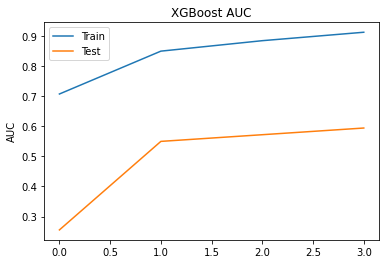

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         6
           1       0.82      0.60      0.69        15

    accuracy                           0.62        21
   macro avg       0.61      0.63      0.60        21
weighted avg       0.70      0.62      0.64        21



In [40]:
print("Acurácia: ", accuracy_score(ytest, ypred))
print("Matriz de confusão: ", confusion_matrix(ytest, ypred))
fig, ax = plt.subplots()

evals_result = trained_model.evals_result()
x_axis = range(0, len(evals_result['validation_0']['auc']))

ax.plot(x_axis, evals_result['validation_0']['auc'], label='Train')
ax.plot(x_axis, evals_result['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

cr = classification_report(ytest, ypred)
print (cr)

In [41]:
explainer = shap.TreeExplainer(trained_model)
shap_values = explainer.shap_values(xtrain)
print(shap_values)

[[-0.04570807  0.          0.         ...  0.          0.
   0.        ]
 [ 0.17304093  0.          0.         ...  0.          0.
   0.        ]
 [-0.13480766  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.04570807  0.          0.         ...  0.          0.
   0.        ]
 [ 0.17304093  0.          0.         ...  0.          0.
   0.        ]
 [-0.13480766  0.          0.         ...  0.          0.
   0.        ]]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


<function matplotlib.pyplot.savefig(*args, **kwargs)>

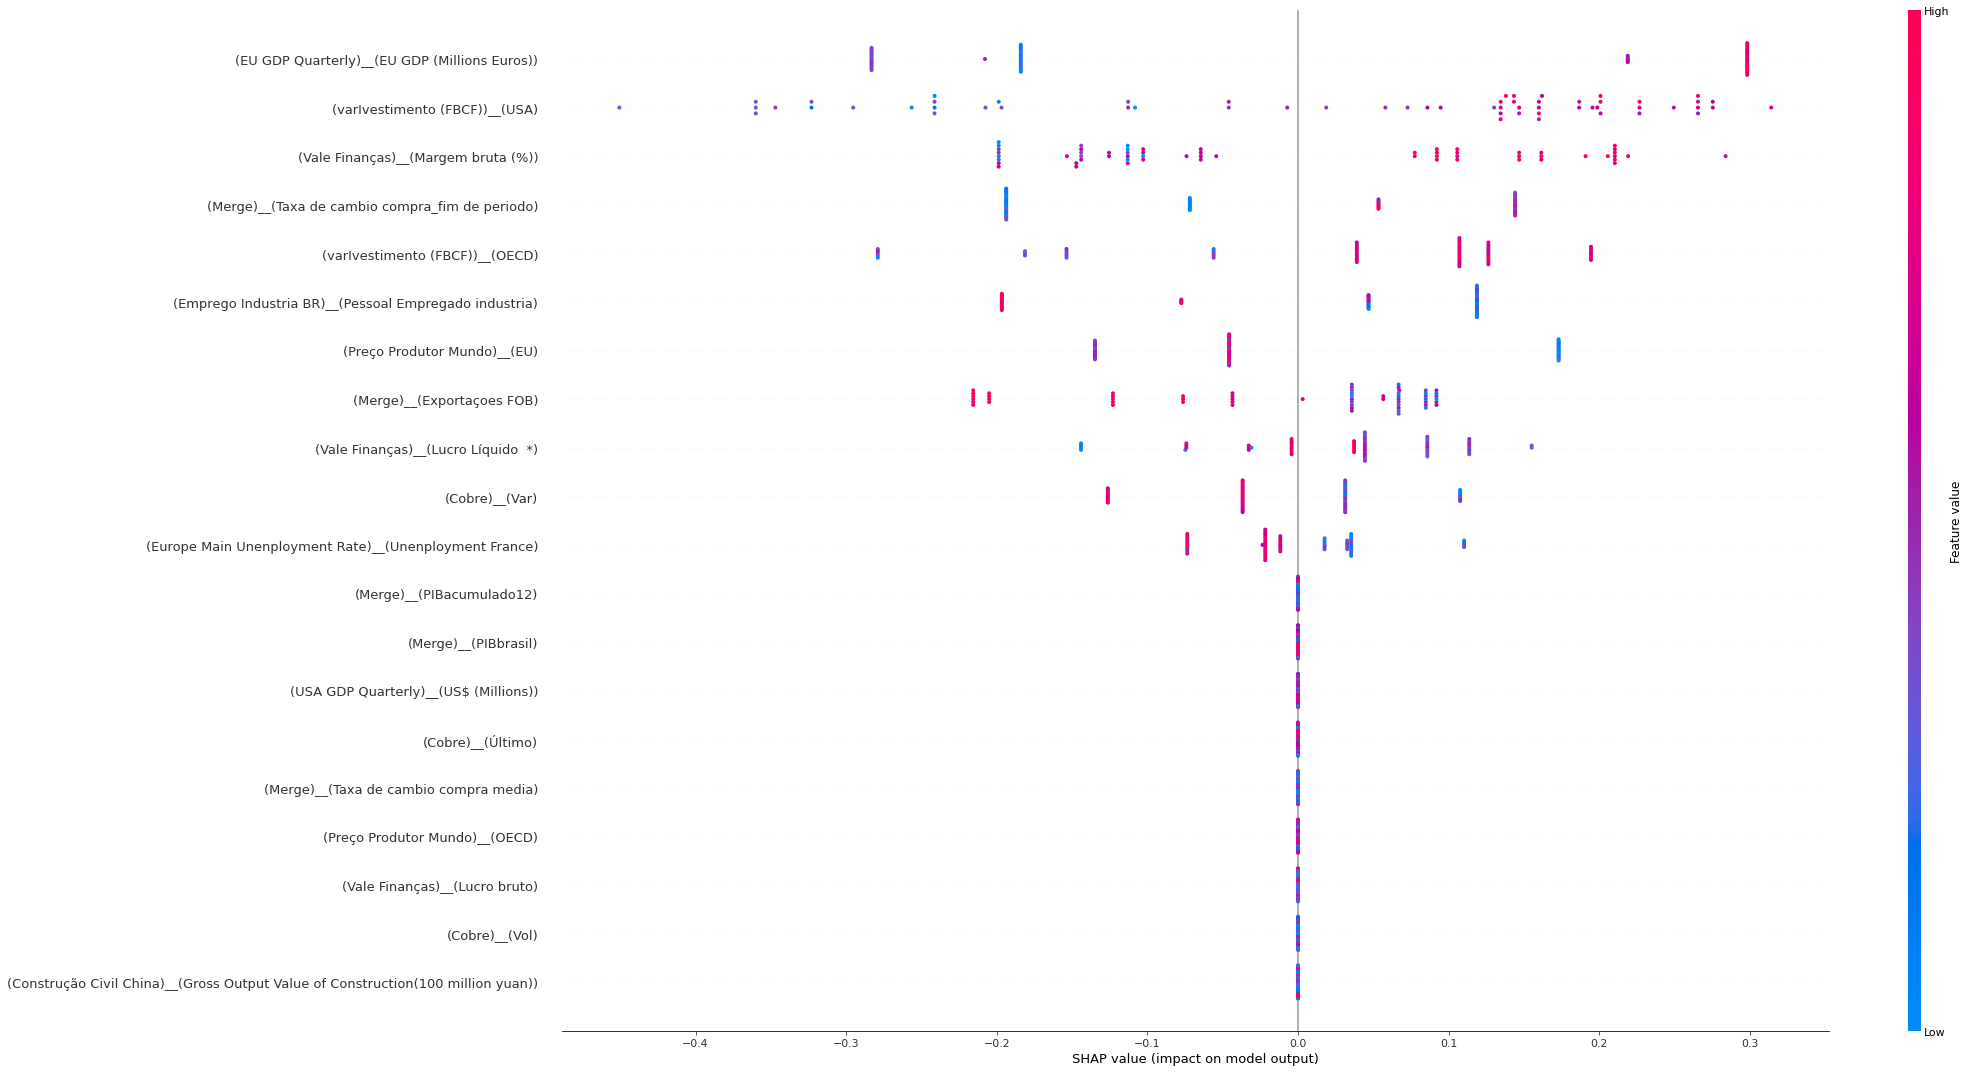

In [42]:
plt_shap = shap.summary_plot(shap_values,features=xtrain,feature_names=xtrain.columns,show=False,plot_size=(30,15))
plt.savefig

In [43]:
x1 = df3[['(EU GDP Quarterly)__(EU GDP (Millions Euros))','(Merge)__(Exportaçoes FOB)','(Cobre)__(Último)','(Merge)__(Taxa de cambio compra media)','(Merge)__(Taxa de cambio compra_fim de periodo)','(Vale Finanças)__(Lucro bruto)','(Cobre)__(Vol)','(Construção Civil China)__(Gross Output Value of Construction(100 million yuan))','(Vale Finanças)__(Margem bruta (%))','(varIvestimento (FBCF))__(BRA)','(GDP OECD)__(OECD)','(Vale Finanças)__(Pesquisa e Desenvolvimento)','(varIvestimento (FBCF))__(USA)','(Cobre)__(Var)','(Emprego Industria BR)__(Pessoal Empregado industria)','(Unemployement USA)__(usa_unemploy)','(Vale Finanças)__(Resultado de Participações Societárias)','(Vale Finanças)__(Custo dos Produtos Vendidos)','(Europe Main Unenployment Rate)__(Unenployment France)','(Merge)__(Taxa de cambio minerais metalicos)','counter']];
y1 = df2['(Vale Ações)__(Class)_Alta']
x1train, x1test, y1train, y1test = train_test_split(x1, y1, test_size=0.25)


In [44]:
params ={
        'min_child_weight': [1, 5, 10],
        'alpha': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,8,10,12,15,20],
        'n_estimators': [4,5,6,7,8,9,10,15,20,30,40,50,60]}
trained_model1 = XGBClassifier(learning_rate=0.3, objective='binary:logistic', nthread=1, verbose = False)

In [45]:
folds = 5
param_comb = 10
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(trained_model1, param_distributions=params, 
                                   n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=4, cv=skf.split(x1,y1), verbose=3, random_state=1001 )
random_search.fit(x1, y1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:55:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001E050A6DEB0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_...
                                           n_estimators=100, n_jobs=None,
                                           nthread=1, num_parallel_tree=None,
                           

In [46]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 30, 'min_child_weight': 1, 'max_depth': 4, 'colsample_bytree': 0.6, 'alpha': 1}


In [82]:
params ={
        'objective': 'binary:logistic',
        'learning_rate': 0.3,
        'min_child_weight': 1,
        'alpha': 1,
        'subsample': 0.8,
        'colsample_bytree': 0.6,
        'max_depth': 4,
        'n_estimators': 5}
trained_model1 = XGBClassifier(**params)
trained_model1.fit(x1train, y1train, eval_set=[(x1train, y1train), (x1test, y1test)], eval_metric='auc', verbose=False)

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [83]:
y1pred = trained_model1.predict(x1test)

Acurácia:  0.5238095238095238
Matriz de confusão:  [[2 7]
 [3 9]]


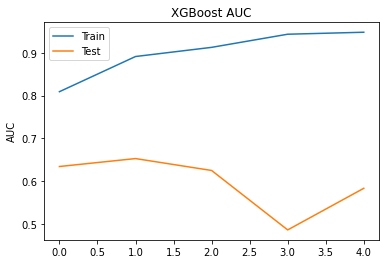

              precision    recall  f1-score   support

           0       0.40      0.22      0.29         9
           1       0.56      0.75      0.64        12

    accuracy                           0.52        21
   macro avg       0.48      0.49      0.46        21
weighted avg       0.49      0.52      0.49        21



In [84]:
print("Acurácia: ", accuracy_score(y1test, y1pred))
print("Matriz de confusão: ", confusion_matrix(y1test, y1pred))
fig, ax = plt.subplots()

evals_result = trained_model1.evals_result()
x_axis = range(0, len(evals_result['validation_0']['auc']))

ax.plot(x_axis, evals_result['validation_0']['auc'], label='Train')
ax.plot(x_axis, evals_result['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

cr1 = classification_report(y1test, y1pred)
print (cr1)

In [50]:
explainer = shap.TreeExplainer(trained_model1)
shap_values1 = explainer.shap_values(x1train)
print(shap_values1)

[[ 0.05317098 -0.9012833   0.00181358 ... -0.21547416  0.01866264
   0.02245368]
 [ 0.02502342  0.20930326  0.00293097 ...  0.09459049  0.01817839
   0.07488986]
 [ 0.07931188  0.11919887  0.00293097 ...  0.08987565  0.01051054
   0.03315091]
 ...
 [-0.04653214 -0.96936387  0.00181358 ...  0.04306943  0.01051054
   0.02245368]
 [ 0.01788238  0.3014089   0.01633614 ...  0.07276972  0.05011959
   0.07488986]
 [ 0.02644857  0.01005941  0.00293097 ... -0.34588802  0.01866264
   0.04089537]]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


<function matplotlib.pyplot.savefig(*args, **kwargs)>

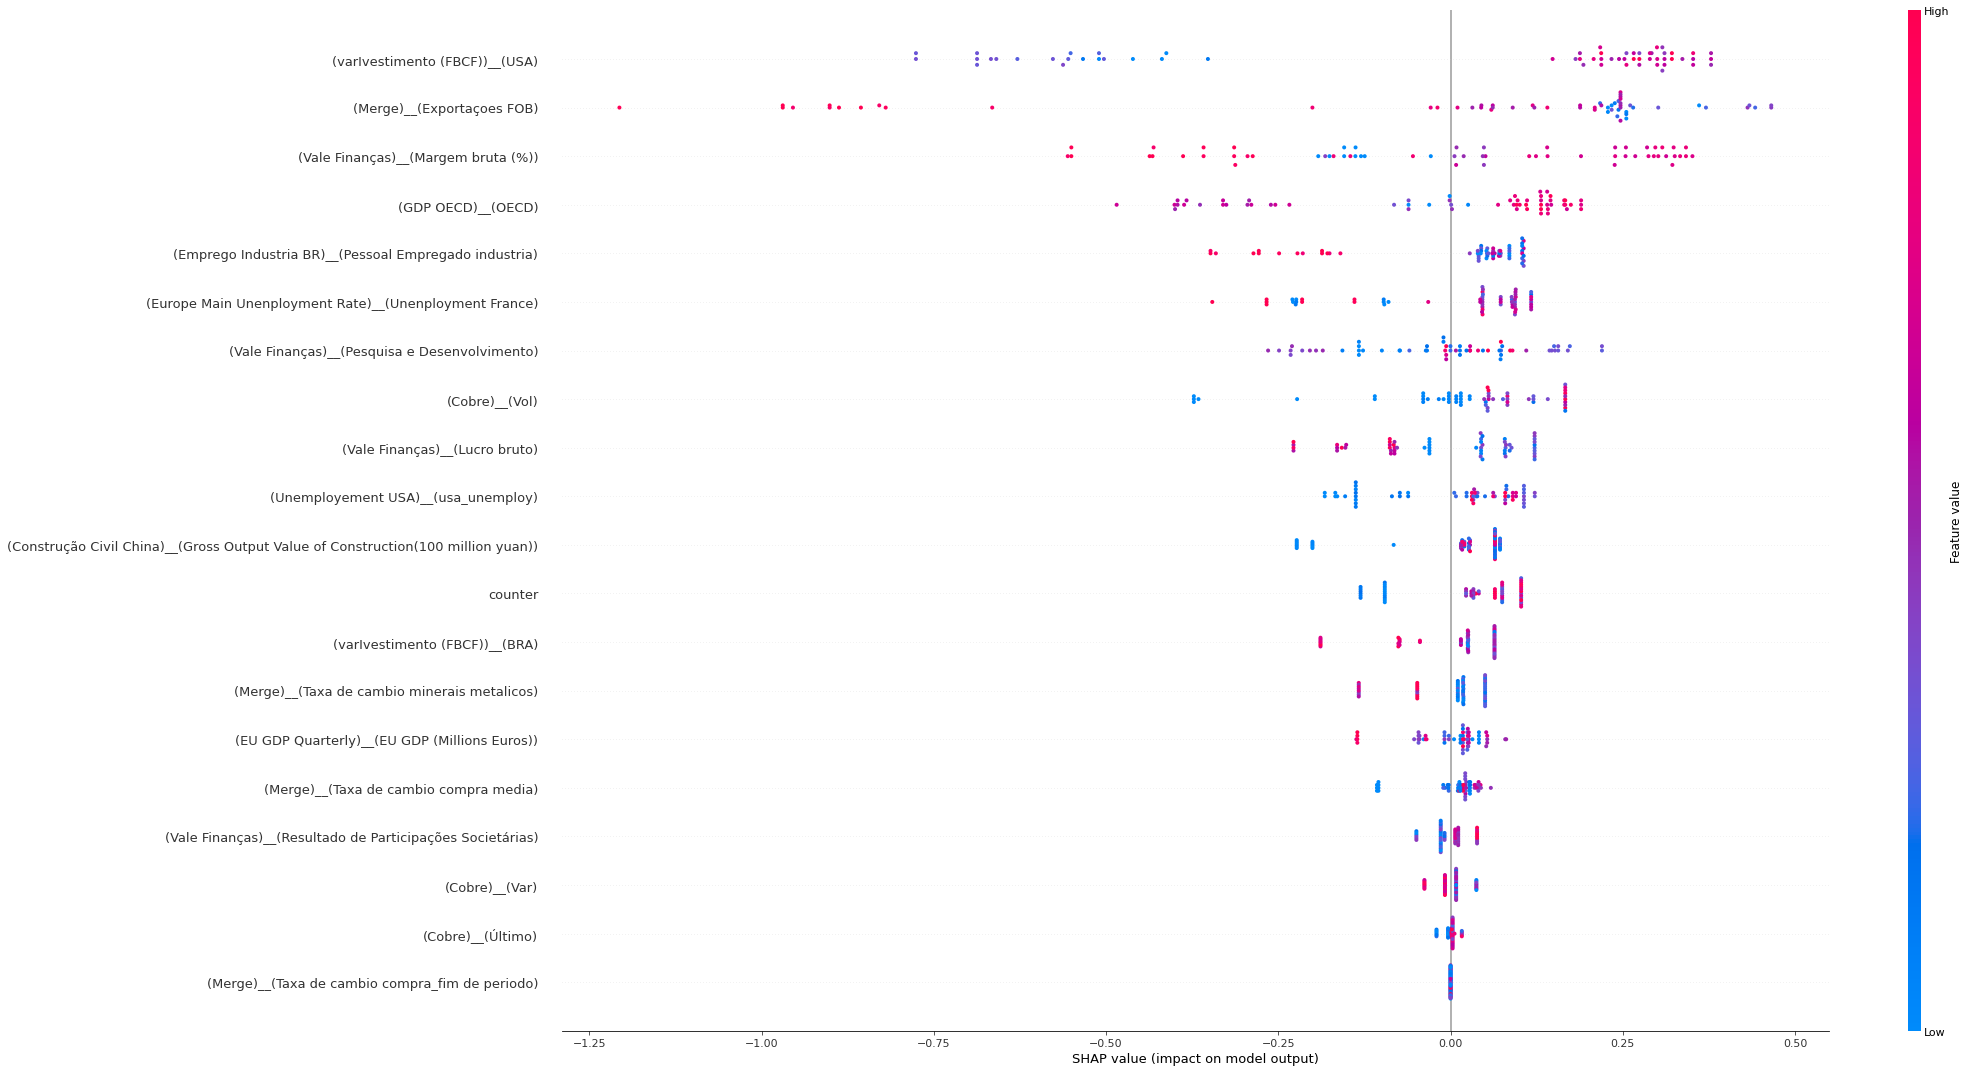

In [51]:
plt_shap = shap.summary_plot(shap_values1,features=x1train,feature_names=x1train.columns,show=False,plot_size=(30,15))
plt.savefig

In [52]:
w = df2[['(Emprego Industria BR)__(Pessoal Empregado industria)','(Cobre)__(Vol)','(EU GDP Quarterly)__(EU GDP (Millions Euros))','(Vale Finanças)__(Resultado de Participações Societárias)','(GDP OECD)__(OECD)','(Merge)__(Exportaçoes FOB)','(Vale Finanças)__(Lucro bruto)','(varIvestimento (FBCF))__(BRA)','(Vale Finanças)__(Margem bruta (%))','(Merge)__(Taxa de cambio compra media)','(varIvestimento (FBCF))__(USA)','(Vale Finanças)__(Pesquisa e Desenvolvimento)']]
z = df2[['(Vale Ações)__(Preço)']]

In [94]:
reg = LinearRegression().fit(w, z)
reg.score(w, z)
zpred = reg.predict(w)

In [95]:
sklearn.metrics.mean_absolute_error(z, zpred)

5.304312235728388

<AxesSubplot:xlabel='(Vale Ações)__(Preço)'>

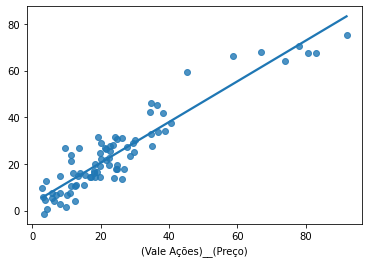

In [107]:
sn.regplot(x=z,y=zpred,ci=None)

In [67]:
w = sm.add_constant(w)
modellr = sm.OLS(z, w)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [68]:
resultslr = modellr.fit()

In [69]:
print(resultslr.summary())

                              OLS Regression Results                             
Dep. Variable:     (Vale Ações)__(Preço)   R-squared:                       0.872
Model:                               OLS   Adj. R-squared:                  0.849
Method:                    Least Squares   F-statistic:                     38.54
Date:                   Sun, 27 Nov 2022   Prob (F-statistic):           1.38e-25
Time:                           17:00:28   Log-Likelihood:                -270.03
No. Observations:                     81   AIC:                             566.1
Df Residuals:                         68   BIC:                             597.2
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [58]:
z

,(Vale Ações)__(Preço)
0,2.836667
1,3.183333
2,3.890000
3,3.796667
4,3.293333
...,...
76,91.983333
77,80.613333
78,66.990000
79,83.136667
